In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from matplotlib.backends.backend_pdf import PdfPages

In [17]:

date = str(sys.argv[1])
outfile=(sys.argv[2])
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+date+'.csv'
df = pd.read_csv(path)



In [18]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)



In [19]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()



/tmp/ipykernel_12487/1484600179.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()


In [8]:
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)

/home/invincible/anaconda3/envs/Adarsh/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


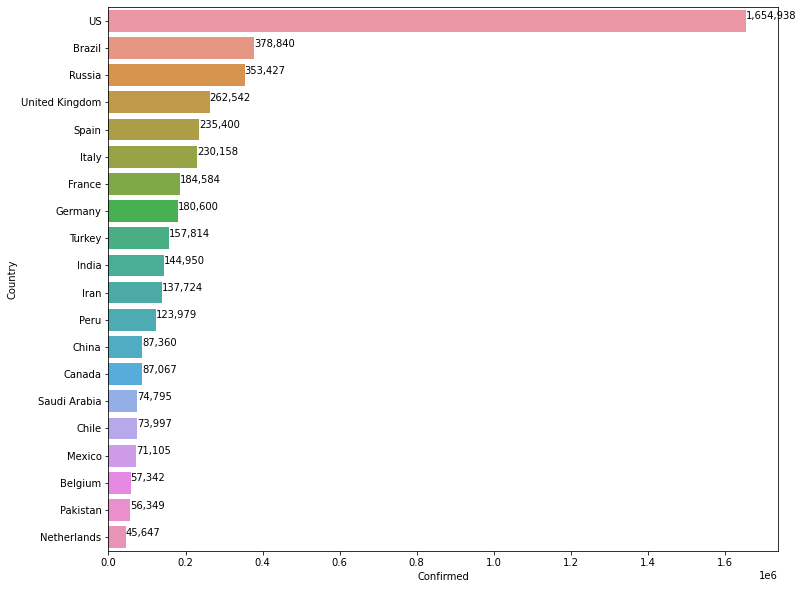

In [22]:
with PdfPages(outfile) as export_pdf:
    plt.figure(figsize=(12,10))
    plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
    for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
        plot.text(value,i-0.05,f'{value:,.0f}',size=10)
    export_pdf.savefig()